# Machine Learning Lab 
## Lab 11 - Support Vector Machine
---
**S Shyam Sundaram** <br>
**19BCE1560** <br>
**October 18, 2021**<br>

**Dr Abdul Quadir MD**<br>
**L31+L32**

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

# Generating non-linear separable data
---

In [42]:
from sklearn.datasets import make_circles

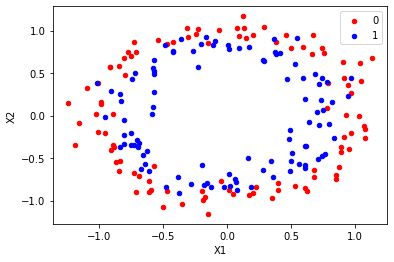

In [43]:
# generate 2d classification dataset
X, y = make_circles(n_samples=200, noise=0.1)

# scatter plot, dots colored by class value
df = pd.DataFrame(dict(X1=X[:,0], X2=X[:,1], Y=y))

colors = {0:'red', 1:'blue'}

fig, ax = plt.subplots()

grouped = df.groupby('Y')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='X1', y='X2', label=key, color=colors[key])
plt.show()

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

# Linear SVM
---

In [45]:
from sklearn.svm import SVC

In [46]:
linear=SVC(kernel='linear')
linear.fit(X_train,y_train)

SVC(kernel='linear')

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
pred=linear.predict(X_test)
accuracy_score(y_test,pred)

0.36666666666666664

# Polynomial SVM kernel
---

In [49]:
df

,X1,X2,Y
0,-0.714792,0.744511,0
1,-0.840725,0.251145,1
2,-1.158434,-0.081527,0
3,0.666726,0.726343,0
4,-0.199792,-0.578271,1
...,...,...,...
195,0.929673,0.004524,0
196,0.490172,-0.651180,1
197,0.549444,0.917475,1
198,0.175297,0.804812,1


In [50]:
df['X3']=df['X1']**2
df['X4']=df['X2']**2
df['X5']=df['X1']*df['X2']
df

,X1,X2,Y,X3,X4,X5
0,-0.714792,0.744511,0,0.510927,0.554297,-0.532170
1,-0.840725,0.251145,1,0.706818,0.063074,-0.211144
2,-1.158434,-0.081527,0,1.341970,0.006647,0.094444
3,0.666726,0.726343,0,0.444524,0.527574,0.484272
4,-0.199792,-0.578271,1,0.039917,0.334397,0.115534
...,...,...,...,...,...,...
195,0.929673,0.004524,0,0.864291,0.000020,0.004206
196,0.490172,-0.651180,1,0.240268,0.424035,-0.319190
197,0.549444,0.917475,1,0.301889,0.841761,0.504101
198,0.175297,0.804812,1,0.030729,0.647723,0.141081


In [51]:
X=df.drop(['Y'],axis=1)
y=df.Y

In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [53]:
fig = px.scatter_3d(df,x='X1',y='X2',z='X5',color='Y')
fig.show()

In [54]:
fig = px.scatter_3d(df,x='X3',y='X4',z='X5',color='Y')
fig.show()

In [55]:
poly=SVC(kernel='poly')
poly.fit(X_train,y_train)

SVC(kernel='poly')

In [56]:
pred=poly.predict(X_test)
accuracy_score(y_test,pred)

0.86

# RBF kernel
---

In [57]:
rbf=SVC(kernel='rbf')
rbf.fit(X_train,y_train)

SVC()

In [58]:
pred=rbf.predict(X_test)
accuracy_score(y_test,pred)

0.88

# Sigmoid kernel
---

In [59]:
sig=SVC(kernel='sigmoid')
sig.fit(X_train,y_train)

SVC(kernel='sigmoid')

In [60]:
pred=sig.predict(X_test)
accuracy_score(y_test,pred)

0.64